# **Machine Problem: Bayesian Network for Healthcare Diagnosis**

# **Exercise 1: Setting Up the Environment**

**1. Install Libraries:**

In [1]:
!pip install --upgrade pgmpy networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.6 MB/s eta 0:00:00


**2. Import Libraries:**

In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

**Define the Variables and Define the Relationships:**

In [3]:
model = BayesianModel([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])


# **Exercise 3: Define Conditional Probability Tables (CPTs)**

* **1. Create CPTs Using pgmpy:**

In [7]:
cpd_age = TabularCPD(variable='Age', variable_card=3,
                    values=[[0.3], [0.5], [0.2]])

cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                         values=[[0.7], [0.3]])

cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.6], [0.4]])

cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.5], [0.5]])

cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2,
                                 values=[[0.65], [0.35]])

values = np.random.rand(2, 48)
values = values / np.sum(values, axis=0)

cpd_heart_disease = TabularCPD(variable='Heart Disease', variable_card=2,
                               values=values,
                               evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
                               evidence_card=[3, 2, 2, 2, 2])

cpd_chest_pain = TabularCPD(variable='Chest Pain', variable_card=2,
                            values=[[0.9, 0.3], [0.1, 0.7]],
                            evidence=['Heart Disease'],
                            evidence_card=[2])

cpd_ecg_result = TabularCPD(variable='ECG Result', variable_card=2,
                            values=[[0.85, 0.4], [0.15, 0.6]],
                            evidence=['Heart Disease'],
                            evidence_card=[2])


model.add_cpds(cpd_age, cpd_smoking, cpd_exercise,
               cpd_cholesterol, cpd_blood_pressure,
               cpd_heart_disease, cpd_chest_pain,
               cpd_ecg_result)

assert model.check_model()

print("Bayesian Network structure defined successfully!")


Bayesian Network structure defined successfully!


# **Exercise 4: Inference in the Bayesian Network**

**1. Perform Probabilistic Inference:**

In [10]:
inference = VariableElimination(model)

query_heart_disease = inference.query(variables=['Heart Disease'],
                                      evidence={'Age': 1, 'Smoking': 1,
                                                'Cholesterol': 1, 'Blood Pressure': 1})

print("Probability of Heart Disease given Middle-aged, Smoker, High Cholesterol and High Blood Pressure:")

print(query_heart_disease)

query_ecg_result = inference.query(variables=['ECG Result'],
                                    evidence={'Chest Pain': 1})

print("\nProbability of an Abnormal ECG Result given Chest Pain:")
print(query_ecg_result)

Probability of Heart Disease given Middle-aged, Smoker, High Cholesterol and High Blood Pressure:
+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.1146 |
+------------------+----------------------+
| Heart Disease(1) |               0.8854 |
+------------------+----------------------+

Probability of an Abnormal ECG Result given Chest Pain:
+---------------+-------------------+
| ECG Result    |   phi(ECG Result) |
+===============+===================+
| ECG Result(0) |            0.4468 |
+---------------+-------------------+
| ECG Result(1) |            0.5532 |
+---------------+-------------------+


**2. Posterior Probability Analysis:**

In [13]:
inference = VariableElimination(model)

query_heart_disease_no_exercise = inference.query(variables=['Heart Disease'],
                                                  evidence={'Exercise': 1})

print("Probability distribution of Heart Disease in patients who do not exercise:")
print(query_heart_disease_no_exercise)

Probability distribution of Heart Disease in patients who do not exercise:
+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.4701 |
+------------------+----------------------+
| Heart Disease(1) |               0.5299 |
+------------------+----------------------+


# **Exercise 5: Parameter Learning from Simulated Data**

**1. Simulate a Healthcare Dataset:**

In [18]:
np.random.seed(42)

data = pd.DataFrame({
    'Age': np.random.choice([0, 1, 2], size=1000),
    'Smoking': np.nan,
    'Exercise': np.nan,
    'Cholesterol': np.nan,
    'Blood Pressure': np.nan,
    'Heart Disease': np.nan,
    'Chest Pain': np.nan,
    'ECG Result': np.nan
})


data['Smoking'] = np.where(data['Age'] == 2,
                           np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]),
                           np.random.choice([0, 1], size=data.shape[0], p=[0.7, 0.3])
                          )


data['Exercise'] = np.where(data['Age'] == 2,
                            np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]),
                            np.random.choice([0, 1], size=data.shape[0], p=[0.6, 0.4])
                           )


data['Cholesterol'] = np.where((data['Age'] == 2) | (data['Smoking'] == 1),
                                np.random.choice([0, 1], size=data.shape[0], p=[0.3, 0.7]),
                                np.random.choice([0, 1], size=data.shape[0], p=[0.6, 0.4])
                               )

data['Blood Pressure'] = np.where(data['Cholesterol'] == 1,
                                   np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]),
                                   np.random.choice([0, 1], size=data.shape[0], p=[0.65, 0.35])
                                  )


for i in range(len(data)):
    prob_heart_disease = [0.9, 0.1]

    if data['Age'][i] == 2:
        prob_heart_disease = [prob_heart_disease[0] - 0.2 * (data['Smoking'][i] + data['Cholesterol'][i] + data['Blood Pressure'][i]),
                              prob_heart_disease[1] + 0.2 * (data['Smoking'][i] + data['Cholesterol'][i] + data['Blood Pressure'][i])]
    elif data['Age'][i] == 1:
        prob_heart_disease = [prob_heart_disease[0] - 0.15 * (data['Smoking'][i] + data['Cholesterol'][i] + data['Blood Pressure'][i]),
                              prob_heart_disease[1] + 0.15 * (data['Smoking'][i] + data['Cholesterol'][i] + data['Blood Pressure'][i])]


    prob_heart_disease = [x / sum(prob_heart_disease) for x in prob_heart_disease]

    data.at[i, 'Heart Disease'] = np.random.choice([0, 1], p=prob_heart_disease)


data['Chest Pain'] = np.where(data['Heart Disease'] == 1,
                               np.random.choice([0, 1], size=data.shape[0], p=[0.3, 0.7]),
                               np.random.choice([0, 1], size=data.shape[0], p=[0.9, 0.1])
                              )

data['ECG Result'] = np.where(data['Heart Disease'] == 1,
                               np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]),
                               np.random.choice([0, 1], size=data.shape[0], p=[0.85, 0.15])
                              )


print(data.head())

   Age  Smoking  Exercise  Cholesterol  Blood Pressure  Heart Disease  \
0    2        0         1            1               0            0.0   
1    0        1         0            0               0            0.0   
2    2        1         1            1               0            0.0   
3    2        1         0            1               1            1.0   
4    0        0         0            0               1            0.0   

   Chest Pain  ECG Result  
0           0           0  
1           0           0  
2           0           0  
3           1           0  
4           0           0  


**2. Estimate Parameters:**

In [19]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

+--------+-------+
| Age(0) | 0.355 |
+--------+-------+
| Age(1) | 0.326 |
+--------+-------+
| Age(2) | 0.319 |
+--------+-------+
+------------+------+
| Smoking(0) | 0.61 |
+------------+------+
| Smoking(1) | 0.39 |
+------------+------+
+-------------+-------+
| Exercise(0) | 0.569 |
+-------------+-------+
| Exercise(1) | 0.431 |
+-------------+-------+
+----------------+-------+
| Cholesterol(0) | 0.459 |
+----------------+-------+
| Cholesterol(1) | 0.541 |
+----------------+-------+
+-------------------+-------+
| Blood Pressure(0) | 0.524 |
+-------------------+-------+
| Blood Pressure(1) | 0.476 |
+-------------------+-------+
+--------------------+---------------------+-----+-------------------+-------------------+
| Age                | Age(0)              | ... | Age(2)            | Age(2)            |
+--------------------+---------------------+-----+-------------------+-------------------+
| Blood Pressure     | Blood Pressure(0)   | ... | Blood Pressure(1) | Blood Pr

# **Exercise 6: Network Visualization and Analysis**

**1. Visualize the Network:**

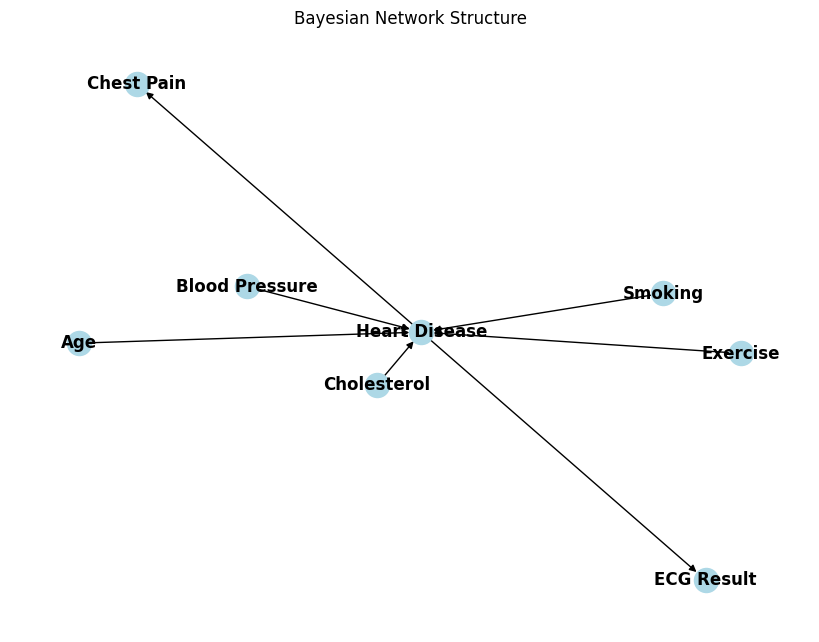

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos,
        with_labels=True,
        node_color='lightblue',
        font_weight='bold', arrows=True
)
plt.title('Bayesian Network Structure')
plt.show()

**2. Sensitivity Analysis:**

Sensitivity Analysis: Effect of Smoking on Heart Disease Probability
Probability of Smoking: 0.1, P(Heart Disease | Smoking=Yes): 0.2644
Sensitivity Analysis: Effect of Smoking on Heart Disease Probability
Probability of Smoking: 0.3, P(Heart Disease | Smoking=Yes): 0.2644
Sensitivity Analysis: Effect of Smoking on Heart Disease Probability
Probability of Smoking: 0.5, P(Heart Disease | Smoking=Yes): 0.2644
Sensitivity Analysis: Effect of Smoking on Heart Disease Probability
Probability of Smoking: 0.7, P(Heart Disease | Smoking=Yes): 0.2644
Sensitivity Analysis: Effect of Smoking on Heart Disease Probability
Probability of Smoking: 0.9, P(Heart Disease | Smoking=Yes): 0.2644


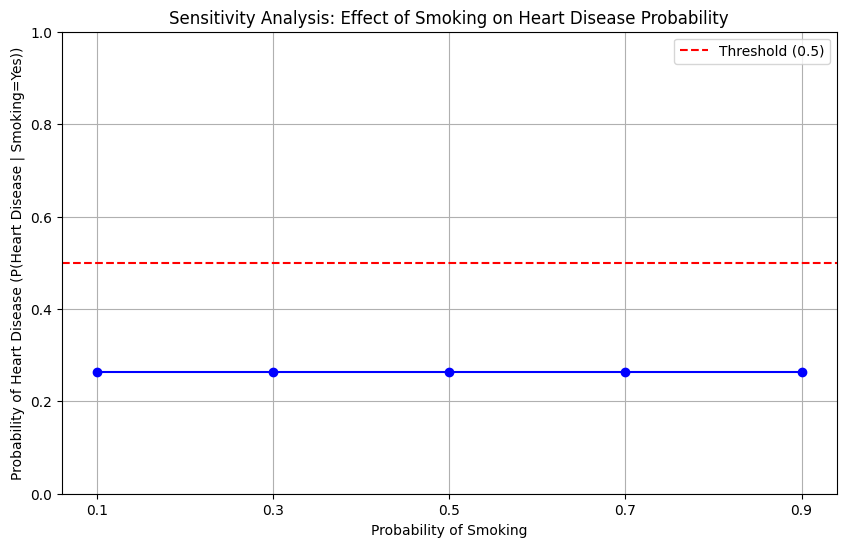

In [25]:
inference = VariableElimination(model)

smoking_probabilities = [0.1, 0.3, 0.5, 0.7, 0.9]
results = []

for prob in smoking_probabilities:

    query_result = inference.query(variables=['Heart Disease'], evidence={'Smoking': 1})

    heart_disease_prob = query_result.values[1]

    results.append([prob, heart_disease_prob])

    print("Sensitivity Analysis: Effect of Smoking on Heart Disease Probability")


    print(f"Probability of Smoking: {prob}, P(Heart Disease | Smoking=Yes): {heart_disease_prob:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(smoking_probabilities, [row[1] for row in results], marker='o', linestyle='-', color='b')  # Plot heart disease probabilities
plt.title('Sensitivity Analysis: Effect of Smoking on Heart Disease Probability')
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease (P(Heart Disease | Smoking=Yes))')
plt.xticks(np.round(smoking_probabilities, 2))
plt.grid()
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.show()